# objectives - get basic model tested after variance inflation factor used for feature selection

- check feature importance afterwards, 

- set up for advanced model tuning 

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

import seaborn as sns

In [7]:
df = pd.read_csv('../../data/model/final_df.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52665 entries, 0 to 52664
Data columns (total 17 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Mean Scale Score                                                  52665 non-null  float64
 1   Total Tested with Scores at Reporting Level                       52665 non-null  float64
 2   Percentage Standard Exceeded                                      52665 non-null  float64
 3   Percentage Standard Not Met                                       52665 non-null  float64
 4   Free_Meal_count                                                   52665 non-null  float64
 5   Latitude                                                          52665 non-null  float64
 6   FTE_Teachers                                                      52665 non-null  float64
 7   Pupil/Teacher-Ratio            

In [8]:
df.head()

,Mean Scale Score,Total Tested with Scores at Reporting Level,Percentage Standard Exceeded,Percentage Standard Not Met,Free_Meal_count,Latitude,FTE_Teachers,Pupil/Teacher-Ratio,Hispanic_Female,Black_or_AA_F,Asian or Asian/Pacific Islander - female [Public School] 2020-21,Avg_21,Average Salary Paid,Current\nExpense Per ADA,est_num_u17_pov,Grocery_3mile,Grocery_dist
0,2579.7,106.0,13.11,19.67,230.0,37.657668,74.847305,20.652848,194.364754,32.206967,361.873975,754920.0,85586.372299,13998.450902,3044.345812,50.0,1372.0
1,2582.4,56.0,16.67,16.67,230.0,37.657668,74.847305,20.652848,194.364754,32.206967,361.873975,754920.0,85586.372299,13998.450902,3044.345812,50.0,1372.0
2,2577.0,50.0,9.68,22.58,230.0,37.657668,74.847305,20.652848,194.364754,32.206967,361.873975,754920.0,85586.372299,13998.450902,3044.345812,50.0,1372.0
3,2600.2,91.0,16.00,12.00,230.0,37.657668,74.847305,20.652848,194.364754,32.206967,361.873975,754920.0,85586.372299,13998.450902,3044.345812,50.0,1372.0
4,2614.4,24.0,22.73,13.64,230.0,37.657668,74.847305,20.652848,194.364754,32.206967,361.873975,754920.0,85586.372299,13998.450902,3044.345812,50.0,1372.0


In [22]:
df['random'] = np.random.random(size = len(df))

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(  df.drop(columns=['Mean Scale Score']),df['Mean Scale Score'] ,
                                                     test_size=0.2, random_state=42)
    
    

In [24]:
 X_train.dtypes

Total Tested with Scores at Reporting Level                         float64
Percentage Standard Exceeded                                        float64
Percentage Standard Not Met                                         float64
Free_Meal_count                                                     float64
Latitude                                                            float64
FTE_Teachers                                                        float64
Pupil/Teacher-Ratio                                                 float64
Hispanic_Female                                                     float64
Black_or_AA_F                                                       float64
Asian or Asian/Pacific Islander - female [Public School] 2020-21    float64
Avg_21                                                              float64
Average Salary Paid                                                 float64
Current\nExpense Per ADA                                            float64
est_num_u17_

In [25]:
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

             

R^2 Training Score: 1.00 
OOB Score: 0.96 
R^2 Validation Score: 0.96


In [29]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))


R^2 Training Score: 1.00 
OOB Score: 0.96 
R^2 Validation Score: 0.96


In [26]:
# https://github.com/erykml/medium_articles/blob/master/Machine%20Learning/feature_importance.ipynb

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [30]:
base_imp = imp_df(X_train.columns, rf.feature_importances_)
base_imp

,feature,feature_importance
0,Percentage Standard Exceeded,0.725468
1,Percentage Standard Not Met,0.214080
2,Pupil/Teacher-Ratio,0.007705
3,Total Tested with Scores at Reporting Level,0.005794
4,Asian or Asian/Pacific Islander - female [Publ...,0.005196
5,Avg_21,0.004909
6,Free_Meal_count,0.004833
7,FTE_Teachers,0.004494
8,Latitude,0.003750
9,Grocery_dist,0.003739


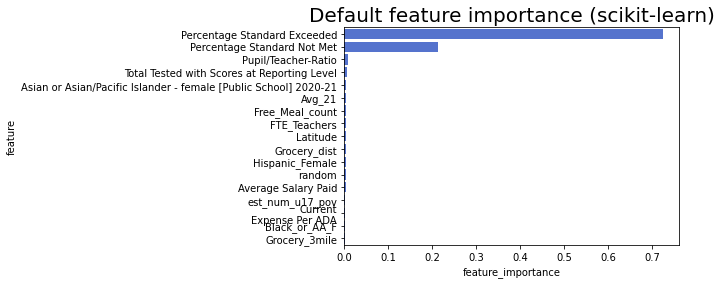

In [31]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')